In [47]:
# invisible
lines = open("img_resolution.txt").readlines()
resolution = lines[0].strip()
if resolution != "default":
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = int(resolution)

<br>



## Matplotlib-Tutorial: Konturflächen und -linien










<img width="40%" class="imgright" src="../images/contour.webp" srcset="../images/contour_400w.webp 400w,../images/contour_350w.webp 350w,../images/contour_300w.webp 300w" alt="multiple plots" />
WEBOFF

<br>



Eine Konturlinie oder Isolinie einer Funktion aus zwei Variablen ist eine Kurve entlang des konstanten Wertes der Funktion. Es ist ein Querschnitt des dreidimensionalen Graphen der Funktion f(x,y) parallel zur x,y-Ebene.

Konturlinien werden beispielsweise in der Geographie oder Meteorologie benutzt. In der Kartographie verbindet eine Konturlinie die Punkte gleicher Höhe über einem bestimmten Level, wie z.B. der mittlere Meeresspiegel

Allgemeiner können wir also sagen, dass eine Konturlinie einer Funktion mit zwei Variablen eine Kurve ist, die Punkte mit gleichen Werten verbindet.

<br><br>

### Erstellen eines Maschengitters

<br><br>




Ein Maschengitter (Meshgrid) ist ein rechteckiges Gitter (Datengitter), was aus zwei  eindimensionalen Arrays erzeugt wird, d.h. den x-Werten und den y-Werten. Im weiteren Verlauf dieses Kapitels werden wir nochmals auf die Funktion ```meshgrid``` und ihre Alternativen zurückkommen.




<img width=600  src="../images/creating_a_meshgrid.webp" srcset="../images/creating_a_meshgrid_800w.webp 800w,../images/creating_a_meshgrid_700w.webp 700w,../images/creating_a_meshgrid_600w.webp 600w,../images/creating_a_meshgrid_500w.webp 500w,../images/creating_a_meshgrid_400w.webp 400w,../images/creating_a_meshgrid_350w.webp 350w,../images/creating_a_meshgrid_300w.webp 300w" alt="subplot layout" />
WEBOFF


In [48]:
import numpy as np

xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)
print(xlist)
print(ylist)
print(X)
print(Y)

[-3.  0.  3.]
[-3. -1.  1.  3.]
[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]]
[[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]]


<br><br>

### Berechnung der Werte

<br><br>

Nun berechnen wir die Funktionswerte zu den Wertepaaren des Maschengitters:




<img width=600 src="../images/calculation_of_the_contour_values.webp" srcset="../images/calculation_of_the_contour_values_700w.webp 700w,../images/calculation_of_the_contour_values_600w.webp 600w,../images/calculation_of_the_contour_values_500w.webp 500w,../images/calculation_of_the_contour_values_400w.webp 400w,../images/calculation_of_the_contour_values_350w.webp 350w,../images/calculation_of_the_contour_values_300w.webp 300w" alt="Calculation of the Contour Values" />
WEBOFF


In [49]:
import numpy as np

xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)
print(Z)

[[4.24264069 3.         4.24264069]
 [3.16227766 1.         3.16227766]
 [3.16227766 1.         3.16227766]
 [4.24264069 3.         4.24264069]]


Aus den Daten erzeugen wir nun den Konturplot:



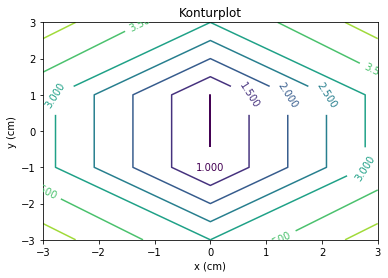

In [50]:
import matplotlib.pyplot as plt

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Konturplot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

Unser Konturplot sieht sehr kantig aus, weil unser Maschengitter nur aus 12 Punkten besteht. Im Folgenden verfeinern wir unser Maschengitter:

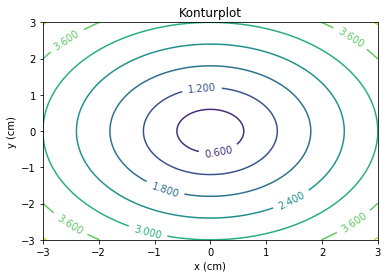

In [51]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Konturplot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<br><br>

### Linienstil und Farben anpassen






Bisher hatten wir den Linienstil automatisch von Matplotlib bestimmen lassen, ebenso wie die Einfärbung. Mit den Parametern ```linestyles``` und ```colors``` können wir diese individuell einstellen.

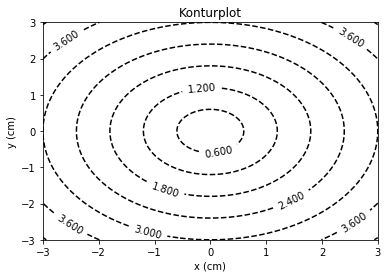

In [52]:
import matplotlib.pyplot as plt

plt.figure()
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed')
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Konturplot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<br><br>

### Gefüllte Konturen



Wir können auch den Zwischenraum zwischen den Konturlinien einfärben:

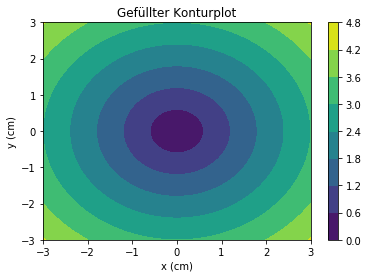

In [53]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)

plt.figure()

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

plt.title('Gefüllter Konturplot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<br><br>

### Individuelle Farben


Die Farben für die Flächen können wir natürlich auch selbst bestimmen, wie wir im folgenden Beispiel sehen:

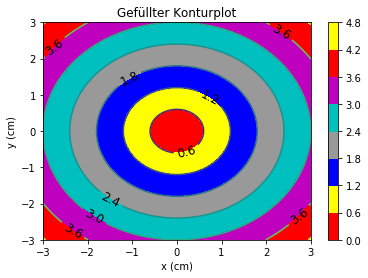

In [54]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)

plt.figure()

contour = plt.contour(X, Y, Z)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
c = ('#ff0000', '#ffff00', '#0000FF', '0.6', 'c', 'm')
contour_filled = plt.contourf(X, Y, Z, colors=c)
plt.colorbar(contour_filled)

plt.title('Gefüllter Konturplot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<br><br>

### Schwellen





Die Schwellen für die Konturlinien und die Flächen werden automatisch durch ```contour``` und ```contourf``` gesetzt. Diese können auch manuell definiert werden, indem als viertes Argument eine Liste mit Levels übergeben wird.
Konturlinien werden für jeden Wert in der Liste gezeichnet, wenn wir ```contour``` benutzen. Wenn ```contourf``` benutzt wird, so werden die Zwischenräume zwischen den Werten der Liste gefüllt.

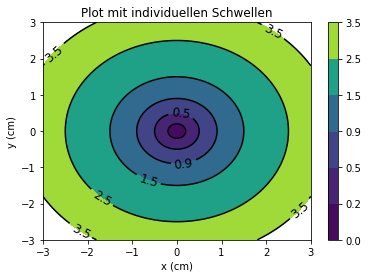

In [55]:
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X ** 2 + Y ** 2 )
plt.figure()

levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)

plt.title('Plot mit individuellen Schwellen')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<br><br>

### Andere Grids

Wir hatten bereits die NumPy-Funktion ```meshgrid``` kennengelernt. NumPy enthält aber noch zwei weitere wichtige Funktionen zur Erzeugung von gitterähnlichen Strukturen:

- ```ogrid```
- ```mgrid```





#### Meshgrid genauer
Die Aufgabe von ```meshgrid``` besteht darin, wie wir gesehen hatten,  aus zwei eindimensionalen Koordinatenvektoren eine zweidimensionale Koordinatenmatrix zu erzeugen. Im allgemeinen Fall kann man aus ```n``` eindimensionalen Array-ähnlichen Strukturen ein ```n```-dimensionales Array zur vektorisierten Auswertung von ```n```-dimensionalen Vektorfeldern über einem ```n```-Gitter erzeugen.

Man könnte eine Gitterstruktur (englisch "grid") auch ohne ```meshgrid``` erzeugen. Im folgenden Beispiel erzeugen wir ein Gitter G mit den Werten 0, 1, 2 als x- und als y-Werte:

In [56]:
n = 3
X, Y = np.zeros((n, n), np.int8), np.zeros((n, n), np.int8)
for row in range(0, n):
    for col in range(0, n):
        X[row, col] = col
        Y[row, col] = row
        
print(X)
print(Y)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


Das $(3, 3)$-Gitter entspricht den Paarungen der entsprechenden Komponenten aus den Arrays $X$ und $Y$, also $X[i, j]$ gepaart mit $Y[i, j]$ mit $0 <= i <= 2$ und $0 <= j <= 2$. Mit einem Plot können wir dieses Gitter sichtbar machen:

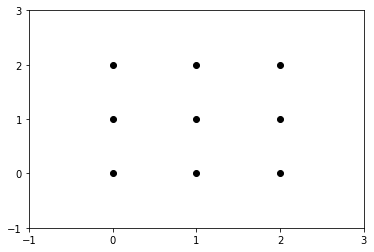

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X, Y, marker='o', color='k', linestyle='none')
plt.xticks(range(-1, n+1))
plt.yticks(range(-1, n+1))
plt.show()

Dies war der umständliche direkte Weg, und mit ```meshgrid``` geht es deutlich schneller und leichter:

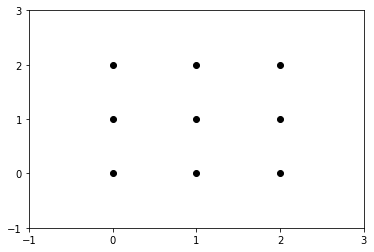

In [58]:
import matplotlib.pyplot as plt
import numpy as np

n = 3
x_values = np.arange(0, n)
y_values = np.arange(0, n)

X, Y = np.meshgrid(x_values, y_values)

plt.plot(X, Y, marker='o', color='k', linestyle='none')
plt.xticks(range(-1, n+1))
plt.yticks(range(-1, n+1))
plt.show()

Im gewissen Sinne ist ```meshgrid``` überflüssig, da man das gleiche Resultat auch mittels Broadcasting erreichen kann:

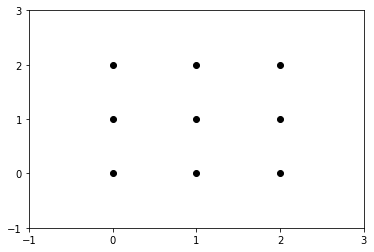

In [59]:
import matplotlib.pyplot as plt
import numpy as np

n = 3
x_values = np.arange(0, n)
y_values = np.arange(0, n)

# meshgrid mit broadcasting:
X = np.ones((n, 1)) * x_values
Y = y_values.reshape((n, 1)) * np.ones((1, n))

plt.plot(X, Y, marker='o', color='k', linestyle='none')
plt.xticks(range(-1, n+1))
plt.yticks(range(-1, n+1))
plt.show()

Wir hatten mit ```meshgrid``` eine quadratische Gitterstruktur erzeugt. Selbstverständlich können wir auch beliebige rechteckige Strukturen erzeugen:  

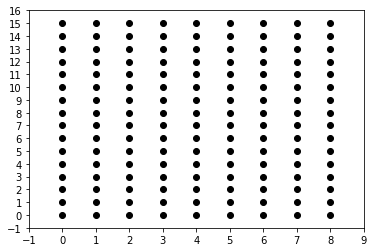

In [60]:
import matplotlib.pyplot as plt
import numpy as np

n, m = 9, 16
x_values = np.arange(0, n)
y_values = np.arange(0, m)

X, Y = np.meshgrid(x_values, y_values)

plt.plot(X, Y, marker='o', color='k', linestyle='none')
plt.xticks(range(-1, n+1))
plt.yticks(range(-1, m+1))
plt.show()

#### mgrid



```mgrid``` benötigt keine Array-ähnlichen Eingabevektoren, sondern wird mit Indices indiziert. Deshalb verwenden wir hier auch eckige Klammern, da es sich nicht um einen Funktionsaufruf handelt. ```mgrid```  und ```meshgrid``` liefern prinzipiell das selbe Ergebnis, allerdings sind die Achsen vertauscht. 

In [61]:
import numpy as np

n = 3
X_mgrid, Y_mgrid = np.mgrid[0:n, 0:n]

n = 3
X_meshgrid, Y_meshgrid = np.meshgrid(np.arange(0, n), 
                                     np.arange(0, n))

print(X_mgrid == Y_meshgrid)
print(Y_mgrid == X_meshgrid)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


#### ogrid



Wir haben sowohl bei ```meshgrid``` als auch bei ```mgrid``` gesehen, dass sich die Werte der beiden erzeugten Matrizen jeweils zeilen- bzw. spaltenweise wiederholen. ```ogrid``` liefert nun jeweils nur einen Zeilen- und einen Spaltenvektor zurück. Dadurch erhalten wir eine speicherschonende Repräsentierung der Werte. Mittels Broadcasting können dann andere Funktionen, die diese Matrizen benötigen, diese implizit erzeugen.

In [62]:
import numpy as np

n = 5
X_ogrid, Y_ogrid = np.ogrid[0:n, 0:n]
print(X_ogrid)
print(Y_ogrid)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[0 1 2 3 4]]


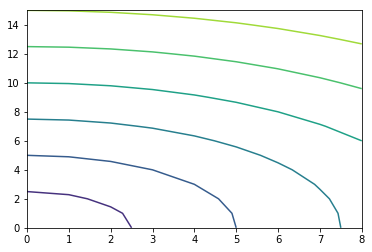

In [63]:
Z = np.sqrt(X**2 + Y**2)

plt.figure()
cp = plt.contour(X, Y, Z)

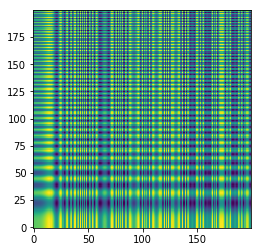

In [64]:
# progr4book

import numpy as np
import matplotlib.pyplot as plt

def sin2d(x, y):
    return np.sin(x**3) + np.cos(y**2)

X, Y = np.meshgrid(np.linspace(0, 5*np.pi, 200), 
                   np.linspace(0, 5*np.pi, 200))
Z = sin2d(X, Y) 

plt.imshow(Z, origin='lower')
plt.show()

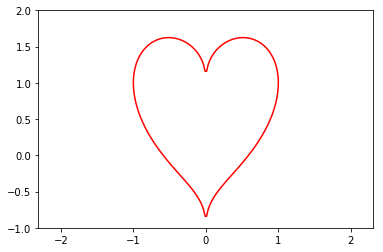

In [65]:
# prog4book
import matplotlib.pyplot as plt
import numpy as np

y, x = np.ogrid[-1:2:100j, -1:1:100j]


plt.contour(x.ravel(), 
            y.ravel(), 
            x ** 2 + (y - ((x ** 2) ** (1.0 / 5))) ** 2, 
            [1],
            colors='red')
plt.axis('equal')
plt.show()


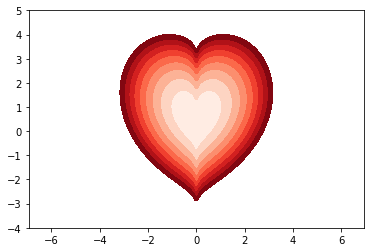

In [66]:
# prog4book
import matplotlib.pyplot as plt
import numpy as np

y, x = np.ogrid[-4:5:100j, -4:4:100j]

plt.contourf(x.ravel(), 
             y.ravel(), 
             x ** 2 + (y - ((x ** 2) ** (1.0/5))) ** 2,
             levels=np.linspace(0, 10, 10),
            cmap='Reds')
plt.axis('equal')
plt.show()